In [1]:
%matplotlib inline
import re
import pandas as pd
import time
import requests
import numpy as np
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import plotly as py
import seaborn as sbn
import textatistic
import string
import textblob
from wordcloud import *
import datetime
from datetime import datetime
from nltk import tokenize
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
matplotlib.style.use('ggplot')
import psycopg2
py.offline.init_notebook_mode()

In [2]:
elon = pd.read_csv("data_elonmusk.csv",encoding="latin1")

In [3]:
elon.head()

row ID                                              Tweet  \
0   Row0  @MeltingIce Assuming max acceleration of 2 to ...   
1   Row1  RT @SpaceX: BFR is capable of transporting sat...   
2   Row2                                     @bigajm Yup :)   
3   Row3                     Part 2 https://t.co/8Fvu57muhM   
4   Row4  Fly to most places on Earth in under 30 mins a...   

                  Time Retweet from      User  
0  2017-09-29 17:39:19          NaN  elonmusk  
1  2017-09-29 10:44:54       SpaceX  elonmusk  
2  2017-09-29 10:39:57          NaN  elonmusk  
3  2017-09-29 09:56:12          NaN  elonmusk  
4  2017-09-29 09:19:21          NaN  elonmusk

### Dropping the user colomn since all the tweets are by Elon

In [4]:
elon= elon.drop(["User"],axis=1)

In [5]:
elon.head()

row ID                                              Tweet  \
0   Row0  @MeltingIce Assuming max acceleration of 2 to ...   
1   Row1  RT @SpaceX: BFR is capable of transporting sat...   
2   Row2                                     @bigajm Yup :)   
3   Row3                     Part 2 https://t.co/8Fvu57muhM   
4   Row4  Fly to most places on Earth in under 30 mins a...   

                  Time Retweet from  
0  2017-09-29 17:39:19          NaN  
1  2017-09-29 10:44:54       SpaceX  
2  2017-09-29 10:39:57          NaN  
3  2017-09-29 09:56:12          NaN  
4  2017-09-29 09:19:21          NaN

In [6]:
translator = str.maketrans({key: None for key in string.punctuation if key != '@'})
def cleanText(description):
    description = description.lower()
    description = description.translate(translator)
    description = re.sub(r'\b\w\b', '', description)
    return description

In [7]:
elon['Tweet_cleaned_with_at'] = elon.Tweet.map(cleanText)

In [8]:
elon.head()

row ID                                              Tweet  \
0   Row0  @MeltingIce Assuming max acceleration of 2 to ...   
1   Row1  RT @SpaceX: BFR is capable of transporting sat...   
2   Row2                                     @bigajm Yup :)   
3   Row3                     Part 2 https://t.co/8Fvu57muhM   
4   Row4  Fly to most places on Earth in under 30 mins a...   

                  Time Retweet from  \
0  2017-09-29 17:39:19          NaN   
1  2017-09-29 10:44:54       SpaceX   
2  2017-09-29 10:39:57          NaN   
3  2017-09-29 09:56:12          NaN   
4  2017-09-29 09:19:21          NaN   

                               Tweet_cleaned_with_at  
0  @meltingice assuming max acceleration of  to  ...  
1  rt @spacex bfr is capable of transporting sate...  
2                                       @bigajm yup   
3                           part  httpstco8fvu57muhm  
4  fly to most places on earth in under 30 mins a...

### Elon's most taggs: 

In [10]:
a = []
for i in elon.Tweet_cleaned_with_at:
    i = i.split()
    for item in i:
        if item.startswith('@'):
            a.append(item)

In [11]:
dictionary = {}
for item in a:
    if item not in dictionary:
        dictionary[item] = 1 
    else: 
        dictionary[item] +=1
    
        


In [12]:
tags = pd.DataFrame()
tags["Tags"]= dictionary.keys()
tags["Count"]= dictionary.values()

In [13]:
tags= tags.sort_values(by=["Count"],ascending= False).reset_index(drop=True)

In [14]:
tags.head()

Tags  Count
0        @spacex    185
1   @teslamotors    180
2      @elonmusk     80
3          @nasa     39
4  @spacestation     26

### Breaking down the timing of the tweets

###Popular tweets per year

In [15]:
def year(y):
    y = y[ :4]
    return y 

def month(m):
    m = m[ 5:7]
    return m 

def day(d):
    d = d[ 8:10]
    return d
def hour(h):
    h = h[ 11:13]
    return h

In [16]:
elon["Year"] = elon.Time.map(year)
elon["Month"] = elon.Time.map(month)
elon["Day"] = elon.Time.map(day)
elon["Hour"] = elon.Time.map(hour)

In [17]:
elon.head()

row ID                                              Tweet  \
0   Row0  @MeltingIce Assuming max acceleration of 2 to ...   
1   Row1  RT @SpaceX: BFR is capable of transporting sat...   
2   Row2                                     @bigajm Yup :)   
3   Row3                     Part 2 https://t.co/8Fvu57muhM   
4   Row4  Fly to most places on Earth in under 30 mins a...   

                  Time Retweet from  \
0  2017-09-29 17:39:19          NaN   
1  2017-09-29 10:44:54       SpaceX   
2  2017-09-29 10:39:57          NaN   
3  2017-09-29 09:56:12          NaN   
4  2017-09-29 09:19:21          NaN   

                               Tweet_cleaned_with_at  Year Month Day Hour  
0  @meltingice assuming max acceleration of  to  ...  2017    09  29   17  
1  rt @spacex bfr is capable of transporting sate...  2017    09  29   10  
2                                       @bigajm yup   2017    09  29   10  
3                           part  httpstco8fvu57muhm  2017    09  29   09  
4  fly to most places on earth in under 30 mins a...  2017    09  29   09

In [18]:
elon["AM_PM"]= ""

In [19]:
elon.head()

row ID                                              Tweet  \
0   Row0  @MeltingIce Assuming max acceleration of 2 to ...   
1   Row1  RT @SpaceX: BFR is capable of transporting sat...   
2   Row2                                     @bigajm Yup :)   
3   Row3                     Part 2 https://t.co/8Fvu57muhM   
4   Row4  Fly to most places on Earth in under 30 mins a...   

                  Time Retweet from  \
0  2017-09-29 17:39:19          NaN   
1  2017-09-29 10:44:54       SpaceX   
2  2017-09-29 10:39:57          NaN   
3  2017-09-29 09:56:12          NaN   
4  2017-09-29 09:19:21          NaN   

                               Tweet_cleaned_with_at  Year Month Day Hour  \
0  @meltingice assuming max acceleration of  to  ...  2017    09  29   17   
1  rt @spacex bfr is capable of transporting sate...  2017    09  29   10   
2                                       @bigajm yup   2017    09  29   10   
3                           part  httpstco8fvu57muhm  2017    09  29   09   
4  fly to most places on earth in under 30 mins a...  2017    09  29   09   

  AM_PM  
0        
1        
2        
3        
4

In [20]:
elon[['Year', 'Month','Day','Hour']] = elon[['Year', 'Month','Day','Hour']].apply(pd.to_numeric)

In [21]:
elon.dtypes

row ID                   object
Tweet                    object
Time                     object
Retweet from             object
Tweet_cleaned_with_at    object
Year                      int64
Month                     int64
Day                       int64
Hour                      int64
AM_PM                    object
dtype: object

###Adding a column to seperate moring-afternoon and evening tweets

In [22]:
for i, row in elon.iterrows():
    if row['Hour'] >= 18:
        elon.loc[i, 'AM_PM'] = 'Evening'
    else:
        elon.loc[i, 'AM_PM'] = 'Morning-Afternoon'

In [23]:
elon.head()

row ID                                              Tweet  \
0   Row0  @MeltingIce Assuming max acceleration of 2 to ...   
1   Row1  RT @SpaceX: BFR is capable of transporting sat...   
2   Row2                                     @bigajm Yup :)   
3   Row3                     Part 2 https://t.co/8Fvu57muhM   
4   Row4  Fly to most places on Earth in under 30 mins a...   

                  Time Retweet from  \
0  2017-09-29 17:39:19          NaN   
1  2017-09-29 10:44:54       SpaceX   
2  2017-09-29 10:39:57          NaN   
3  2017-09-29 09:56:12          NaN   
4  2017-09-29 09:19:21          NaN   

                               Tweet_cleaned_with_at  Year  Month  Day  Hour  \
0  @meltingice assuming max acceleration of  to  ...  2017      9   29    17   
1  rt @spacex bfr is capable of transporting sate...  2017      9   29    10   
2                                       @bigajm yup   2017      9   29    10   
3                           part  httpstco8fvu57muhm  2017      9   29     9   
4  fly to most places on earth in under 30 mins a...  2017      9   29     9   

               AM_PM  
0  Morning-Afternoon  
1  Morning-Afternoon  
2  Morning-Afternoon  
3  Morning-Afternoon  
4  Morning-Afternoon

###How many tweets did Elon post per year?

In [24]:
#Using dictionaries:
yr= {}
for item in elon.Year:
    if item not in yr:
        count=1
        yr[item]=count
    else:
        yr[item]+=1
        

In [25]:
yr

{2012: 55, 2013: 479, 2014: 231, 2015: 436, 2016: 934, 2017: 1083}

In [26]:
df_year = pd.DataFrame()

In [27]:
df_year['YEAR'] = yr.keys()
df_year['COUNT'] = yr.values()

In [28]:
df_year.head()

YEAR  COUNT
0  2016    934
1  2017   1083
2  2012     55
3  2013    479
4  2014    231

In [29]:
df_year = df_year.sort_values(by=['YEAR']).reset_index(drop=True)

In [30]:
df_year.head()

YEAR  COUNT
0  2012     55
1  2013    479
2  2014    231
3  2015    436
4  2016    934

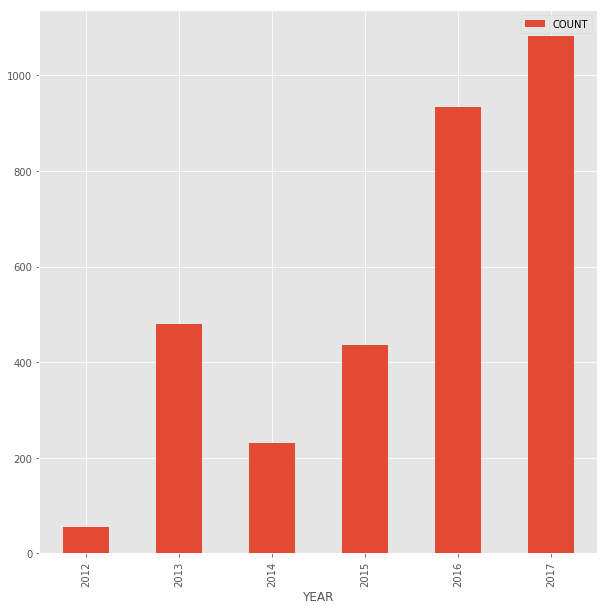

In [31]:
df_year.plot.bar(figsize= (10,10), x= 'YEAR', y='COUNT')

#How many tweets did Elon post per month?

###Using GroupBy instead of Dictionary to count the most popular Month Elon tweeted in

In [32]:
result = elon.groupby(elon.Month)['Month'].count()

In [33]:
df_mnth = pd.DataFrame(result)

In [34]:
df_mnth = df_mnth.rename(columns={'Month':'Count'}).reset_index()

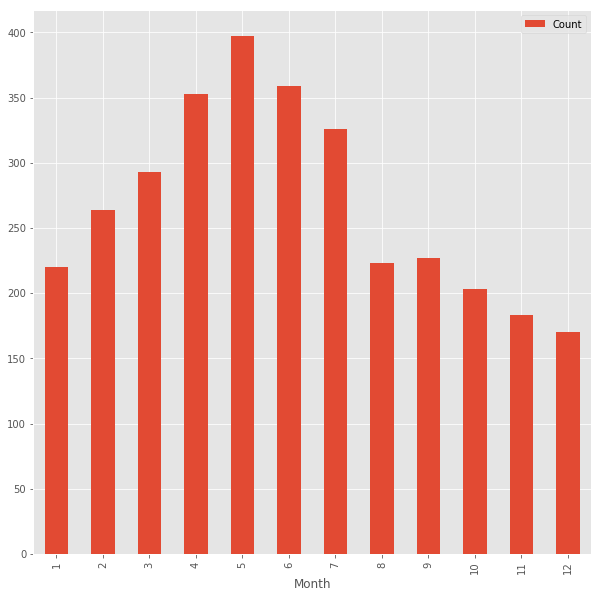

In [35]:
df_mnth.plot.bar(figsize = (10,10), x='Month', y= 'Count')

How many tweets did Elon post per day? and which day is the most popular one?

In [36]:
result = elon.groupby(elon.Day)['Day'].count()

In [37]:
df_day = pd.DataFrame(result)

In [38]:
df_day = df_day.rename(columns={'Day':'Count'}).reset_index()

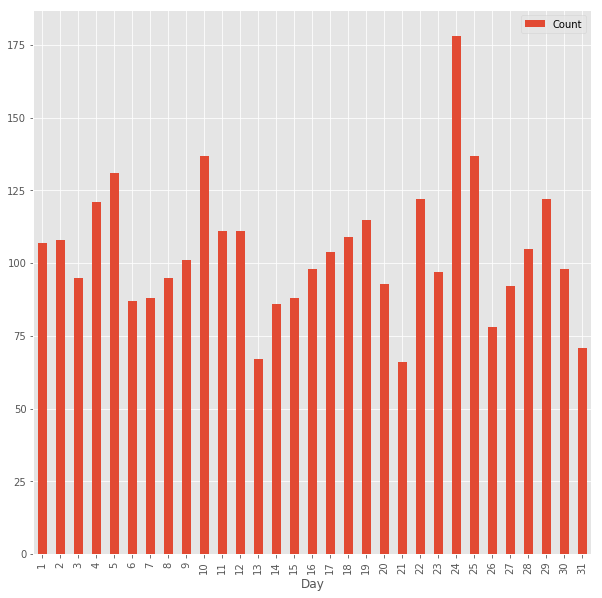

In [39]:
df_day.plot.bar(figsize = (10,10), x='Day', y= 'Count')

Translating the numeric "days to days of the week":

In [40]:
elon.head()

row ID                                              Tweet  \
0   Row0  @MeltingIce Assuming max acceleration of 2 to ...   
1   Row1  RT @SpaceX: BFR is capable of transporting sat...   
2   Row2                                     @bigajm Yup :)   
3   Row3                     Part 2 https://t.co/8Fvu57muhM   
4   Row4  Fly to most places on Earth in under 30 mins a...   

                  Time Retweet from  \
0  2017-09-29 17:39:19          NaN   
1  2017-09-29 10:44:54       SpaceX   
2  2017-09-29 10:39:57          NaN   
3  2017-09-29 09:56:12          NaN   
4  2017-09-29 09:19:21          NaN   

                               Tweet_cleaned_with_at  Year  Month  Day  Hour  \
0  @meltingice assuming max acceleration of  to  ...  2017      9   29    17   
1  rt @spacex bfr is capable of transporting sate...  2017      9   29    10   
2                                       @bigajm yup   2017      9   29    10   
3                           part  httpstco8fvu57muhm  2017      9   29     9   
4  fly to most places on earth in under 30 mins a...  2017      9   29     9   

               AM_PM  
0  Morning-Afternoon  
1  Morning-Afternoon  
2  Morning-Afternoon  
3  Morning-Afternoon  
4  Morning-Afternoon

In [41]:
def time(i):
    i = i[:10]
    return i

In [42]:
elon['DOW'] = ''

In [43]:
elon["Date"]= elon.Time.map(time)

In [44]:
def day_of_the_week(item):
    item = datetime.strptime(item, "%Y-%m-%d").strftime("%A")
    return item

In [45]:
elon['DOW'] = elon.Date.map(day_of_the_week)

In [46]:
elon.head()

row ID                                              Tweet  \
0   Row0  @MeltingIce Assuming max acceleration of 2 to ...   
1   Row1  RT @SpaceX: BFR is capable of transporting sat...   
2   Row2                                     @bigajm Yup :)   
3   Row3                     Part 2 https://t.co/8Fvu57muhM   
4   Row4  Fly to most places on Earth in under 30 mins a...   

                  Time Retweet from  \
0  2017-09-29 17:39:19          NaN   
1  2017-09-29 10:44:54       SpaceX   
2  2017-09-29 10:39:57          NaN   
3  2017-09-29 09:56:12          NaN   
4  2017-09-29 09:19:21          NaN   

                               Tweet_cleaned_with_at  Year  Month  Day  Hour  \
0  @meltingice assuming max acceleration of  to  ...  2017      9   29    17   
1  rt @spacex bfr is capable of transporting sate...  2017      9   29    10   
2                                       @bigajm yup   2017      9   29    10   
3                           part  httpstco8fvu57muhm  2017      9   29     9   
4  fly to most places on earth in under 30 mins a...  2017      9   29     9   

               AM_PM     DOW        Date  
0  Morning-Afternoon  Friday  2017-09-29  
1  Morning-Afternoon  Friday  2017-09-29  
2  Morning-Afternoon  Friday  2017-09-29  
3  Morning-Afternoon  Friday  2017-09-29  
4  Morning-Afternoon  Friday  2017-09-29

In [47]:
result = elon.groupby(elon.DOW)['DOW'].count()

In [48]:
df_dow = pd.DataFrame(result)

In [49]:
df_dow = df_dow.rename(columns={'DOW':'Count'}).reset_index()

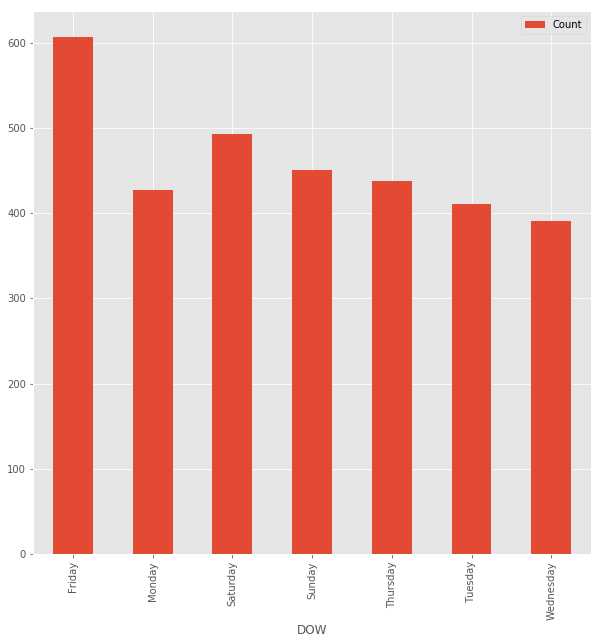

In [50]:
df_dow.plot.bar(figsize = (10,10), x='DOW', y= 'Count')

What time of the day does Elon tweet the most?

In [51]:
result = elon.groupby(elon.AM_PM)['AM_PM'].count()

In [52]:
df_AM_PM = pd.DataFrame(result)

In [53]:
df_AM_PM = df_AM_PM.rename(columns={'AM_PM':'Count'}).reset_index()

In [54]:
df_AM_PM = df_AM_PM.set_index(['AM_PM'])

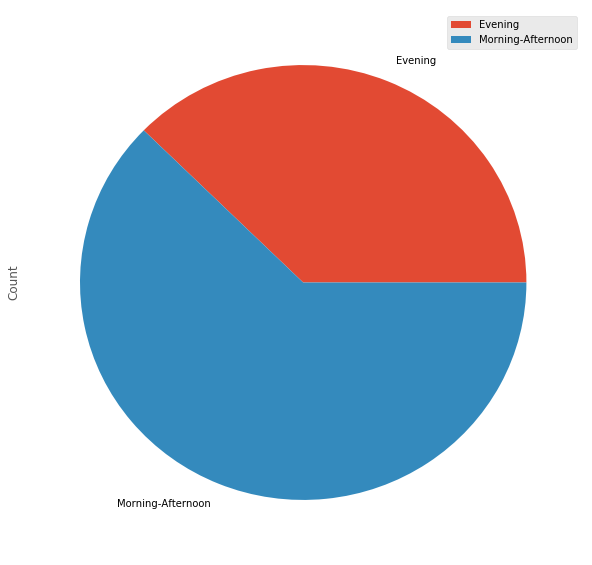

In [55]:
df_AM_PM.plot.pie(figsize = (10,10), x='AM_PM', y= 'Count')

##Tweets Complexity:
    Cleaning data and getting rid of unneccessary figures:
   

In [56]:
translator = str.maketrans({key: None for key in string.punctuation})
def cleanText(description):
    description = description.lower()
    description = description.translate(translator)
    description = re.sub(r'\b\w\b', '', description)
    return description

In [57]:
def tb_score(text):
    res=textblob.TextBlob(text)
    return res.sentiment.polarity

def tb_score_sub(text):
    res=textblob.TextBlob(text)
    return res.sentiment.subjectivity

In [58]:
def drop_http_and_at(item):
    item = item.split()
    for i in item:
        if i.startswith('http') or i.startswith('@'):
            item.remove(i)
    item = ' '.join(item)
    return item

In [59]:
elon['Tweet_without_http_and_at'] = elon.Tweet.map(drop_http_and_at)

In [60]:
elon.head()

row ID                                              Tweet  \
0   Row0  @MeltingIce Assuming max acceleration of 2 to ...   
1   Row1  RT @SpaceX: BFR is capable of transporting sat...   
2   Row2                                     @bigajm Yup :)   
3   Row3                     Part 2 https://t.co/8Fvu57muhM   
4   Row4  Fly to most places on Earth in under 30 mins a...   

                  Time Retweet from  \
0  2017-09-29 17:39:19          NaN   
1  2017-09-29 10:44:54       SpaceX   
2  2017-09-29 10:39:57          NaN   
3  2017-09-29 09:56:12          NaN   
4  2017-09-29 09:19:21          NaN   

                               Tweet_cleaned_with_at  Year  Month  Day  Hour  \
0  @meltingice assuming max acceleration of  to  ...  2017      9   29    17   
1  rt @spacex bfr is capable of transporting sate...  2017      9   29    10   
2                                       @bigajm yup   2017      9   29    10   
3                           part  httpstco8fvu57muhm  2017      9   29     9   
4  fly to most places on earth in under 30 mins a...  2017      9   29     9   

               AM_PM     DOW        Date  \
0  Morning-Afternoon  Friday  2017-09-29   
1  Morning-Afternoon  Friday  2017-09-29   
2  Morning-Afternoon  Friday  2017-09-29   
3  Morning-Afternoon  Friday  2017-09-29   
4  Morning-Afternoon  Friday  2017-09-29   

                           Tweet_without_http_and_at  
0  Assuming max acceleration of 2 to 3 g's, but i...  
1  RT BFR is capable of transporting satellites t...  
2                                             Yup :)  
3                                             Part 2  
4  Fly to most places on Earth in under 30 mins a...

In [61]:
elon["cleaned_tweets"]= elon.Tweet_without_http_and_at.map(cleanText)

In [62]:
elon.head()

row ID                                              Tweet  \
0   Row0  @MeltingIce Assuming max acceleration of 2 to ...   
1   Row1  RT @SpaceX: BFR is capable of transporting sat...   
2   Row2                                     @bigajm Yup :)   
3   Row3                     Part 2 https://t.co/8Fvu57muhM   
4   Row4  Fly to most places on Earth in under 30 mins a...   

                  Time Retweet from  \
0  2017-09-29 17:39:19          NaN   
1  2017-09-29 10:44:54       SpaceX   
2  2017-09-29 10:39:57          NaN   
3  2017-09-29 09:56:12          NaN   
4  2017-09-29 09:19:21          NaN   

                               Tweet_cleaned_with_at  Year  Month  Day  Hour  \
0  @meltingice assuming max acceleration of  to  ...  2017      9   29    17   
1  rt @spacex bfr is capable of transporting sate...  2017      9   29    10   
2                                       @bigajm yup   2017      9   29    10   
3                           part  httpstco8fvu57muhm  2017      9   29     9   
4  fly to most places on earth in under 30 mins a...  2017      9   29     9   

               AM_PM     DOW        Date  \
0  Morning-Afternoon  Friday  2017-09-29   
1  Morning-Afternoon  Friday  2017-09-29   
2  Morning-Afternoon  Friday  2017-09-29   
3  Morning-Afternoon  Friday  2017-09-29   
4  Morning-Afternoon  Friday  2017-09-29   

                           Tweet_without_http_and_at  \
0  Assuming max acceleration of 2 to 3 g's, but i...   
1  RT BFR is capable of transporting satellites t...   
2                                             Yup :)   
3                                             Part 2   
4  Fly to most places on Earth in under 30 mins a...   

                                      cleaned_tweets  
0  assuming max acceleration of  to  gs but in  c...  
1  rt bfr is capable of transporting satellites t...  
2                                               yup   
3                                              part   
4  fly to most places on earth in under 30 mins a...

In [63]:
elon["tb_score"]=elon.cleaned_tweets.map(tb_score)

In [64]:
elon.head()

row ID                                              Tweet  \
0   Row0  @MeltingIce Assuming max acceleration of 2 to ...   
1   Row1  RT @SpaceX: BFR is capable of transporting sat...   
2   Row2                                     @bigajm Yup :)   
3   Row3                     Part 2 https://t.co/8Fvu57muhM   
4   Row4  Fly to most places on Earth in under 30 mins a...   

                  Time Retweet from  \
0  2017-09-29 17:39:19          NaN   
1  2017-09-29 10:44:54       SpaceX   
2  2017-09-29 10:39:57          NaN   
3  2017-09-29 09:56:12          NaN   
4  2017-09-29 09:19:21          NaN   

                               Tweet_cleaned_with_at  Year  Month  Day  Hour  \
0  @meltingice assuming max acceleration of  to  ...  2017      9   29    17   
1  rt @spacex bfr is capable of transporting sate...  2017      9   29    10   
2                                       @bigajm yup   2017      9   29    10   
3                           part  httpstco8fvu57muhm  2017      9   29     9   
4  fly to most places on earth in under 30 mins a...  2017      9   29     9   

               AM_PM     DOW        Date  \
0  Morning-Afternoon  Friday  2017-09-29   
1  Morning-Afternoon  Friday  2017-09-29   
2  Morning-Afternoon  Friday  2017-09-29   
3  Morning-Afternoon  Friday  2017-09-29   
4  Morning-Afternoon  Friday  2017-09-29   

                           Tweet_without_http_and_at  \
0  Assuming max acceleration of 2 to 3 g's, but i...   
1  RT BFR is capable of transporting satellites t...   
2                                             Yup :)   
3                                             Part 2   
4  Fly to most places on Earth in under 30 mins a...   

                                      cleaned_tweets  tb_score  
0  assuming max acceleration of  to  gs but in  c...  0.366667  
1  rt bfr is capable of transporting satellites t...  0.200000  
2                                               yup   0.000000  
3                                              part   0.000000  
4  fly to most places on earth in under 30 mins a...  0.650000

What are the negative tweets that were posted by Elon?

In [65]:
ng_twt =pd.DataFrame()

In [66]:
for i, row in elon.iterrows():
    if row['tb_score'] < 0:
        ng_twt.loc[i, 'neg_tweet'] = row['cleaned_tweets']

In [67]:
ng_twt = ng_twt.reset_index(drop=True)

In [68]:
ng_twt.head()

neg_tweet
0  bfr will take you anywhere on earth in less th...
1                                    moon base alpha
2  prev ideas for paying 10b dev cost incl kickst...
3  def not ok just sent  reminder to tesla stores...
4                promise to be as boring as possible

How many negative tweets did Elon post?

In [69]:
ng_twt.count()

neg_tweet    419
dtype: int64

What are the positive tweets posted by Elon?

In [70]:
pos_twt =pd.DataFrame()

In [71]:
for i, row in elon.iterrows():
    if row['tb_score'] > 0:
        pos_twt.loc[i, 'pos_tweet'] = row['cleaned_tweets']

In [72]:
pos_twt = pos_twt.reset_index(drop=True)

In [73]:
pos_twt.head()

pos_tweet
0  assuming max acceleration of  to  gs but in  c...
1  rt bfr is capable of transporting satellites t...
2  fly to most places on earth in under 30 mins a...
3  rt supporting the creation of  permanent selfs...
4  will be announcing something really special at...

How many positive tweets did Elon post?

In [74]:
pos_twt.count()

pos_tweet    1527
dtype: int64

What are the most words used in negative tweets?

In [75]:
sw = set(stopwords.words())

In [76]:
patt = re.compile(r'rt|would|tesla|model|car')

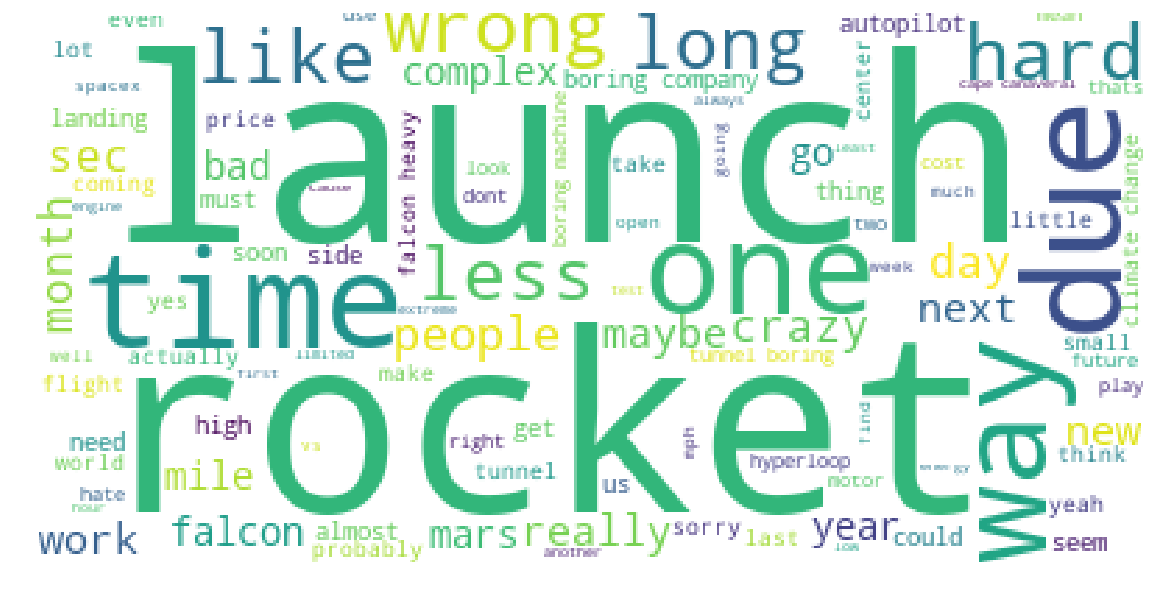

In [77]:
fig, ax = plt.subplots(figsize=(20,20))
wcp = WordCloud(max_words=100,
                stopwords=sw,
                background_color='white').generate(re.sub(patt,'',
        " ".join(ng_twt.neg_tweet)))



ax.axis('off')
ax.imshow(wcp)

What are the most words used in negative tweets?

In [78]:
patt = re.compile(r'rt|tesla|model')

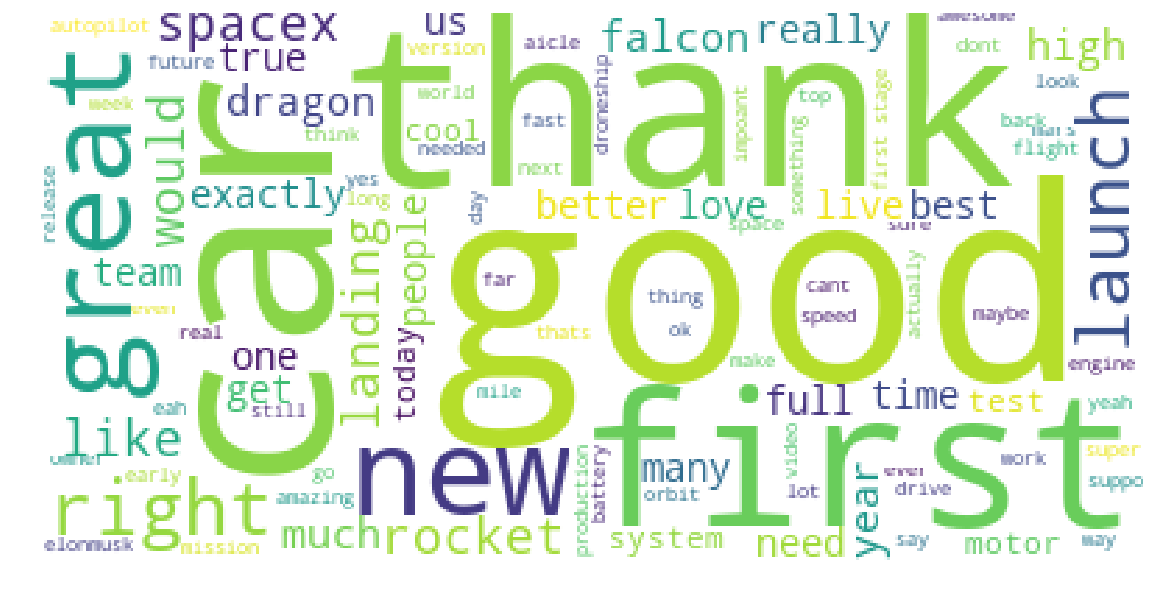

In [79]:
fig, ax = plt.subplots(figsize=(20,20))
wcp = WordCloud(max_words=100,
                stopwords=sw,
                background_color='white').generate(re.sub(patt,'',
        " ".join(pos_twt.pos_tweet)))



ax.axis('off')
ax.imshow(wcp)